In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [69]:
students_height_data = pd.read_csv('/Users/kdanmobile/Side_Project/data_lemak/Student_WeightandHeight_vs_economies_TW/學生身高平均值(6歲-15歲).csv')
students_weight_data = pd.read_csv('/Users/kdanmobile/Side_Project/data_lemak/Student_WeightandHeight_vs_economies_TW/學生體重平均值(6歲-15歲).csv')
economic_data = pd.read_csv('/Users/kdanmobile/Side_Project/data_lemak/Student_WeightandHeight_vs_economies_TW/國民所得統計.csv')

In [47]:
print(students_height_data.info())
print(students_weight_data.info())
print(economic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   學年度     160 non-null    int64  
 1   年齡      160 non-null    int64  
 2   總計      160 non-null    float64
 3   男       160 non-null    float64
 4   女       160 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 6.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   學年度     160 non-null    int64  
 1   年齡      160 non-null    int64  
 2   總計      160 non-null    float64
 3   男       160 non-null    float64
 4   女       160 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 6.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------     

In [48]:
students_weight_data

,學年度,年齡,總計,男,女
0,96,6,22.4,23.0,21.8
1,96,7,24.6,25.3,23.9
2,96,8,27.9,28.7,27.0
3,96,9,31.8,32.8,30.8
4,96,10,36.3,37.2,35.3
...,...,...,...,...,...
155,111,11,41.4,42.4,40.4
156,111,12,46.8,48.2,45.3
157,111,13,51.7,54.3,48.9
158,111,14,55.5,59.4,51.4


In [70]:
students_height_data['學年度'] = (students_height_data['學年度']+1911)
students_weight_data['學年度'] = (students_weight_data['學年度']+1911)


In [81]:
economic_data[economic_data['Item'] == '平均每人GDP、當期價格N.T.元']

,Item,TIME_PERIOD,FREQ,TYPE,Item_VALUE
288,平均每人GDP、當期價格N.T.元,1951,Y,原始值,1589.00
289,平均每人GDP、當期價格N.T.元,1951,Y,年增率(%),NaN
290,平均每人GDP、當期價格N.T.元,1952,Y,原始值,2147.00
291,平均每人GDP、當期價格N.T.元,1952,Y,年增率(%),35.12
292,平均每人GDP、當期價格N.T.元,1953,Y,原始值,2764.00
...,...,...,...,...,...
427,平均每人GDP、當期價格N.T.元,2020,Y,年增率(%),5.38
428,平均每人GDP、當期價格N.T.元,2021,Y,原始值,923086.00
429,平均每人GDP、當期價格N.T.元,2021,Y,年增率(%),9.31
430,平均每人GDP、當期價格N.T.元,2022,Y,原始值,972550.00


In [24]:
# 分離出原始值和年增率的數據行
df_original = economic_data[economic_data['TYPE'] == '原始值'].copy()
df_growth_rate = economic_data[economic_data['TYPE'] == '年增率(%)'].copy()

# 重命名數值列以反映它們的含義
df_original.rename(columns={'Item_VALUE': 'Original_Value'}, inplace=True)
df_growth_rate.rename(columns={'Item_VALUE': 'Growth_Rate'}, inplace=True)
df_original.drop(['FREQ', 'TYPE'], axis=1, inplace=True)
df_growth_rate.drop([ 'FREQ', 'TYPE'], axis=1, inplace=True)

df_original

,Item,TIME_PERIOD,Original_Value
0,平均每人GNI、當期價格N.T.元,1951,1588.0
2,平均每人GNI、當期價格N.T.元,1952,2146.0
4,平均每人GNI、當期價格N.T.元,1953,2764.0
6,平均每人GNI、當期價格N.T.元,1954,2928.0
8,平均每人GNI、當期價格N.T.元,1955,3363.0
...,...,...,...
1142,平均每人民間消費支出、當期價格U.S.元,2018,13514.0
1144,平均每人民間消費支出、當期價格U.S.元,2019,13542.0
1146,平均每人民間消費支出、當期價格U.S.元,2020,13764.0
1148,平均每人民間消費支出、當期價格U.S.元,2021,14760.0


In [25]:
df_growth_rate

,Item,TIME_PERIOD,Growth_Rate
1,平均每人GNI、當期價格N.T.元,1951,NaN
3,平均每人GNI、當期價格N.T.元,1952,35.14
5,平均每人GNI、當期價格N.T.元,1953,28.80
7,平均每人GNI、當期價格N.T.元,1954,5.93
9,平均每人GNI、當期價格N.T.元,1955,14.86
...,...,...,...
1143,平均每人民間消費支出、當期價格U.S.元,2018,3.91
1145,平均每人民間消費支出、當期價格U.S.元,2019,0.21
1147,平均每人民間消費支出、當期價格U.S.元,2020,1.64
1149,平均每人民間消費支出、當期價格U.S.元,2021,7.24


In [26]:
df_combined = pd.merge(df_original, df_growth_rate, on=['TIME_PERIOD','Item'], how='left')
df_combined


,Item,TIME_PERIOD,Original_Value,Growth_Rate
0,平均每人GNI、當期價格N.T.元,1951,1588.0,NaN
1,平均每人GNI、當期價格N.T.元,1952,2146.0,35.14
2,平均每人GNI、當期價格N.T.元,1953,2764.0,28.80
3,平均每人GNI、當期價格N.T.元,1954,2928.0,5.93
4,平均每人GNI、當期價格N.T.元,1955,3363.0,14.86
...,...,...,...,...
571,平均每人民間消費支出、當期價格U.S.元,2018,13514.0,3.91
572,平均每人民間消費支出、當期價格U.S.元,2019,13542.0,0.21
573,平均每人民間消費支出、當期價格U.S.元,2020,13764.0,1.64
574,平均每人民間消費支出、當期價格U.S.元,2021,14760.0,7.24


In [27]:
df_combined['Item'].unique()

array(['平均每人GNI、當期價格N.T.元', '平均每人GNI、當期價格U.S.元', '平均每人GDP、當期價格N.T.元',
       '平均每人GDP、當期價格U.S.元', '平均每人NI、當期價格N.T.元', '平均每人NI、當期價格U.S.元',
       '平均每人民間消費支出、當期價格N.T.元', '平均每人民間消費支出、當期價格U.S.元'], dtype=object)

In [31]:
df_GNI = df_combined[df_combined['Item'] == '平均每人GNI、當期價格N.T.元'].copy()
df_NI = df_combined[df_combined['Item'] == '平均每人NI、當期價格N.T.元'].copy()
df_GDP = df_combined[df_combined['Item'] == '平均每人GDP、當期價格N.T.元'].copy()
df_exp = df_combined[df_combined['Item'] == '平均每人民間消費支出、當期價格N.T.元'].copy()

In [39]:
df_GNI.rename(columns={'Original_Value': 'GNI_Value','Growth_Rate': 'GNI_Growth_Rate'}, inplace=True)
df_GNI.drop('Item', axis=1, inplace=True)

In [41]:
df_GDP.rename(columns={'Original_Value': 'GDP_Value','Growth_Rate': 'GDP_Growth_Rate'}, inplace=True)
df_GDP.drop('Item', axis=1, inplace=True)
df_NI.rename(columns={'Original_Value': 'NI_Value','Growth_Rate': 'NI_Growth_Rate'}, inplace=True)
df_NI.drop('Item', axis=1, inplace=True)
df_exp.rename(columns={'Original_Value': 'exp_Value','Growth_Rate': 'exp_Growth_Rate'}, inplace=True)
df_exp.drop('Item', axis=1, inplace=True)

In [42]:
df_exp

,TIME_PERIOD,exp_Value,exp_Growth_Rate
432,1951,1157.0,NaN
433,1952,1590.0,37.42
434,1953,2094.0,31.70
435,1954,2172.0,3.72
436,1955,2428.0,11.79
...,...,...,...
499,2018,407568.0,2.95
500,2019,418844.0,2.77
501,2020,407134.0,-2.80
502,2021,413574.0,1.58


In [43]:
df_combined = pd.merge(df_GDP, df_NI, on='TIME_PERIOD', how='left')
df_combined = pd.merge(df_combined, df_GNI, on='TIME_PERIOD', how='left')
df_combined = pd.merge(df_combined, df_exp, on='TIME_PERIOD', how='left')
df_combined


,TIME_PERIOD,GDP_Value,GDP_Growth_Rate,NI_Value,NI_Growth_Rate,GNI_Value,GNI_Growth_Rate,exp_Value,exp_Growth_Rate
0,1951,1589.0,NaN,1582.0,NaN,1588.0,NaN,1157.0,NaN
1,1952,2147.0,35.12,2127.0,34.45,2146.0,35.14,1590.0,37.42
2,1953,2764.0,28.74,2726.0,28.16,2764.0,28.80,2094.0,31.70
3,1954,2928.0,5.93,2864.0,5.06,2928.0,5.93,2172.0,3.72
4,1955,3364.0,14.89,3270.0,14.18,3363.0,14.86,2428.0,11.79
...,...,...,...,...,...,...,...,...,...
67,2018,779260.0,2.07,677201.0,1.39,796852.0,1.84,407568.0,2.95
68,2019,801348.0,2.83,691326.0,2.09,821527.0,3.10,418844.0,2.77
69,2020,844485.0,5.38,730744.0,5.70,868732.0,5.75,407134.0,-2.80
70,2021,923086.0,9.31,805883.0,10.28,947294.0,9.04,413574.0,1.58


In [72]:
students_height_data.rename(columns={'學年度': 'TIME_PERIOD','年齡': 'age','總計' :'total_height','男':'boy_height','女':'girl_height'}, inplace=True)
students_weight_data.rename(columns={'學年度': 'TIME_PERIOD','年齡': 'age','總計' :'total_weight','男':'boy_weight','女':'girl_weight'}, inplace=True)


In [73]:
students_height_data

,TIME_PERIOD,age,total_height,boy_height,girl_height
0,2007,6,117.1,117.6,116.6
1,2007,7,121.4,121.9,120.9
2,2007,8,127.1,127.5,126.7
3,2007,9,132.8,132.9,132.6
4,2007,10,138.8,138.5,139.3
...,...,...,...,...,...
155,2022,11,146.1,145.3,147.0
156,2022,12,152.5,152.5,152.4
157,2022,13,158.2,160.2,156.0
158,2022,14,162.0,165.9,157.8


In [66]:
students_weight_data

,TIME_PERIOD,age,total_weight,boy_weight,girl_weight
0,2007,6,22.4,23.0,21.8
1,2007,7,24.6,25.3,23.9
2,2007,8,27.9,28.7,27.0
3,2007,9,31.8,32.8,30.8
4,2007,10,36.3,37.2,35.3
...,...,...,...,...,...
155,2022,11,41.4,42.4,40.4
156,2022,12,46.8,48.2,45.3
157,2022,13,51.7,54.3,48.9
158,2022,14,55.5,59.4,51.4


In [74]:
students_records = pd.merge(students_height_data, students_weight_data, on=['TIME_PERIOD','age'], how='left')
students_records


,TIME_PERIOD,age,total_height,boy_height,girl_height,total_weight,boy_weight,girl_weight
0,2007,6,117.1,117.6,116.6,22.4,23.0,21.8
1,2007,7,121.4,121.9,120.9,24.6,25.3,23.9
2,2007,8,127.1,127.5,126.7,27.9,28.7,27.0
3,2007,9,132.8,132.9,132.6,31.8,32.8,30.8
4,2007,10,138.8,138.5,139.3,36.3,37.2,35.3
...,...,...,...,...,...,...,...,...
155,2022,11,146.1,145.3,147.0,41.4,42.4,40.4
156,2022,12,152.5,152.5,152.4,46.8,48.2,45.3
157,2022,13,158.2,160.2,156.0,51.7,54.3,48.9
158,2022,14,162.0,165.9,157.8,55.5,59.4,51.4


In [79]:
df_merged = pd.merge(students_records, df_combined, on='TIME_PERIOD', how='left')
df_merged['boy_BMI'] = df_merged['boy_weight'] / (df_merged['boy_height']/100)**2
df_merged['girl_BMI'] = df_merged['girl_weight'] / (df_merged['girl_height']/100)**2
df_merged['total_BMI'] = df_merged['total_weight'] / (df_merged['total_height']/100)**2
df_merged


,TIME_PERIOD,age,total_height,boy_height,girl_height,total_weight,boy_weight,girl_weight,GDP_Value,GDP_Growth_Rate,NI_Value,NI_Growth_Rate,GNI_Value,GNI_Growth_Rate,exp_Value,exp_Growth_Rate,boy_BMI,girl_BMI,total_BMI
0,2007,6,117.1,117.6,116.6,22.4,23.0,21.8,583133.0,5.86,503548.0,4.06,597334.0,5.86,313787.0,3.16,16.630802,16.034647,16.335568
1,2007,7,121.4,121.9,120.9,24.6,25.3,23.9,583133.0,5.86,503548.0,4.06,597334.0,5.86,313787.0,3.16,17.026019,16.351037,16.691591
2,2007,8,127.1,127.5,126.7,27.9,28.7,27.0,583133.0,5.86,503548.0,4.06,597334.0,5.86,313787.0,3.16,17.654748,16.819401,17.270826
3,2007,9,132.8,132.9,132.6,31.8,32.8,30.8,583133.0,5.86,503548.0,4.06,597334.0,5.86,313787.0,3.16,18.570512,17.517159,18.031463
4,2007,10,138.8,138.5,139.3,36.3,37.2,35.3,583133.0,5.86,503548.0,4.06,597334.0,5.86,313787.0,3.16,19.392928,18.191666,18.842030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2022,11,146.1,145.3,147.0,41.4,42.4,40.4,972550.0,5.36,838294.0,4.02,1002341.0,5.81,444329.0,7.44,20.083279,18.695914,19.395452
156,2022,12,152.5,152.5,152.4,46.8,48.2,45.3,972550.0,5.36,838294.0,4.02,1002341.0,5.81,444329.0,7.44,20.725611,19.504206,20.123623
157,2022,13,158.2,160.2,156.0,51.7,54.3,48.9,972550.0,5.36,838294.0,4.02,1002341.0,5.81,444329.0,7.44,21.158009,20.093688,20.657492
158,2022,14,162.0,165.9,157.8,55.5,59.4,51.4,972550.0,5.36,838294.0,4.02,1002341.0,5.81,444329.0,7.44,21.582099,20.641874,21.147691


In [82]:
# export df_merged as csv   
df_merged.to_csv('df_merged.csv', index=False)

/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

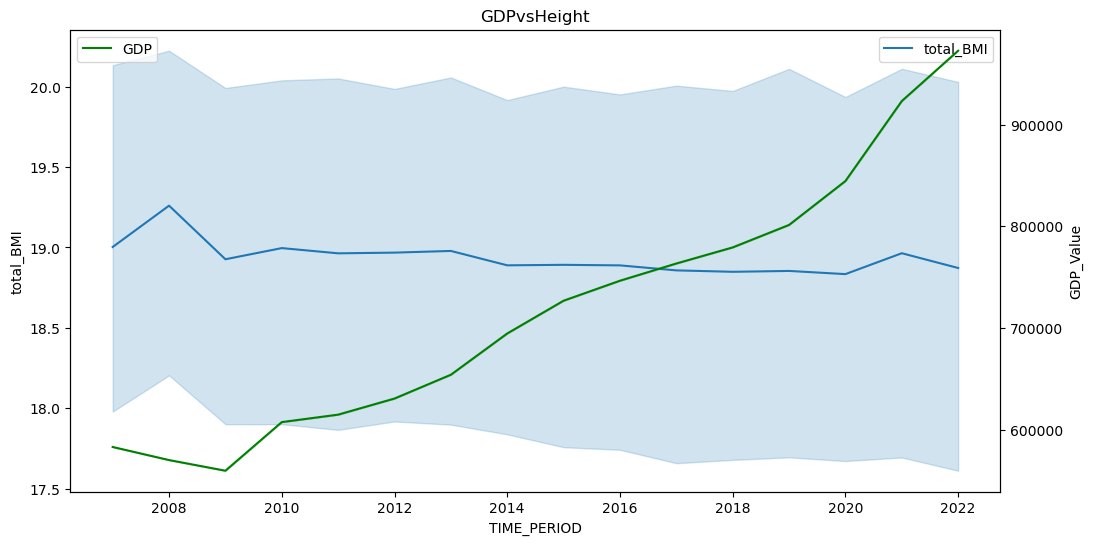

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='TIME_PERIOD', y='total_BMI', data=df_merged, label='total_BMI')
plt.twinx()
sns.lineplot(x='TIME_PERIOD', y='GDP_Value', data=df_merged, color='green', label='GDP')
plt.title('GDPvsHeight')
plt.legend()
plt.show()

In [84]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TIME_PERIOD      160 non-null    int64  
 1   age              160 non-null    int64  
 2   total_height     160 non-null    float64
 3   boy_height       160 non-null    float64
 4   girl_height      160 non-null    float64
 5   total_weight     160 non-null    float64
 6   boy_weight       160 non-null    float64
 7   girl_weight      160 non-null    float64
 8   GDP_Value        160 non-null    float64
 9   GDP_Growth_Rate  160 non-null    float64
 10  NI_Value         160 non-null    float64
 11  NI_Growth_Rate   160 non-null    float64
 12  GNI_Value        160 non-null    float64
 13  GNI_Growth_Rate  160 non-null    float64
 14  exp_Value        160 non-null    float64
 15  exp_Growth_Rate  160 non-null    float64
 16  boy_BMI          160 non-null    float64
 17  girl_BMI        

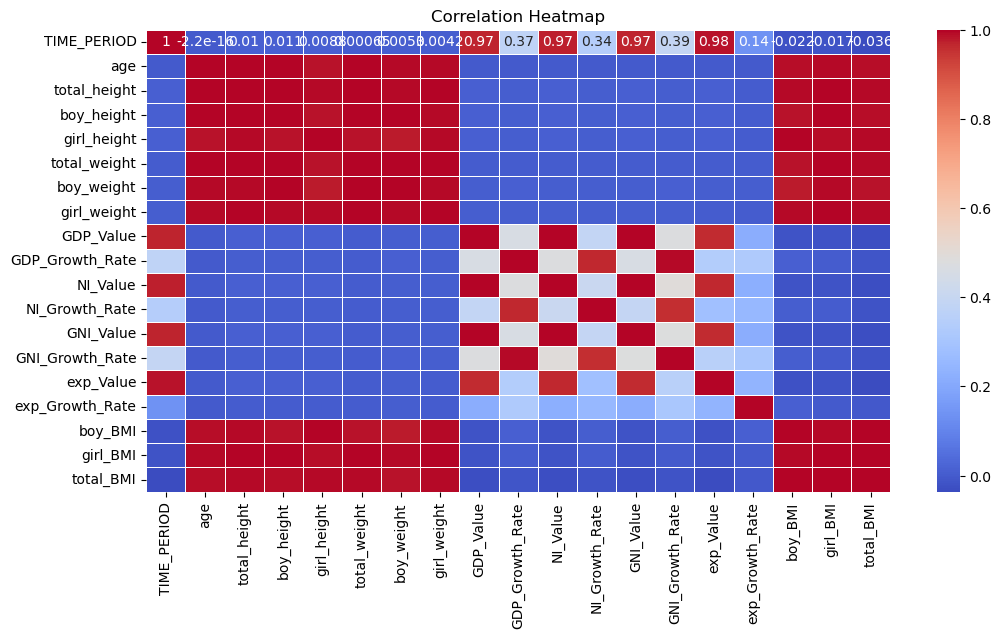

In [86]:
correlation_matrix = df_merged.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kdanmobile/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


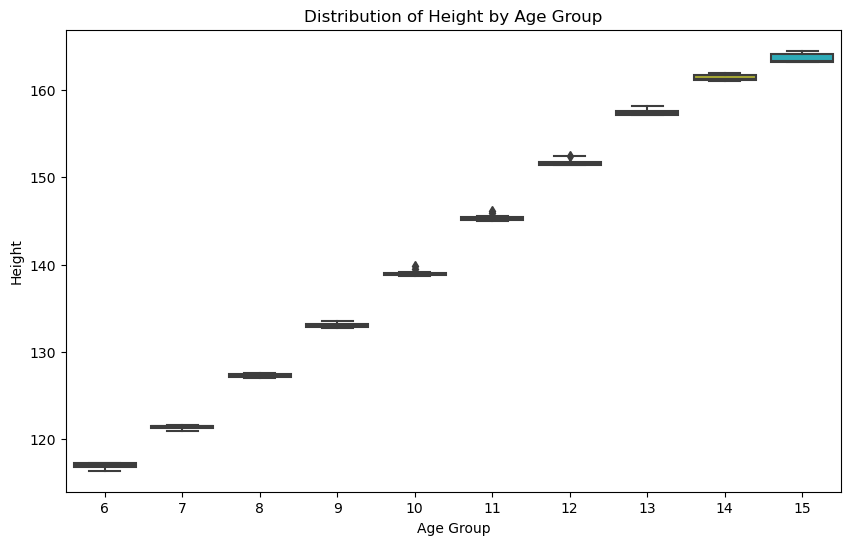

In [93]:
# 使用seaborn创建图表4
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['age'], y=df_merged['total_height'], data=df_merged)
plt.xlabel('Age Group')
plt.ylabel('Height')
plt.title('Distribution of Height by Age Group')
plt.show()

In [101]:
# 使用statsmodels库进行多变量回归分析
import statsmodels.api as sm

X = df_merged[['GDP_Value', 'exp_Value']]  # 自变量（经济指标）
X = sm.add_constant(X)  # 添加常数项
Y = df_merged['total_height']  # 因变量（平均身高）

model = sm.OLS(Y, X).fit()  # 创建并拟合线性回归模型
print(model.summary())  # 打印回归结果摘要

                            OLS Regression Results                            
Dep. Variable:           total_height   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.01142
Date:                Sun, 03 Dec 2023   Prob (F-statistic):              0.989
Time:                        21:13:46   Log-Likelihood:                -670.13
No. Observations:                 160   AIC:                             1346.
Df Residuals:                     157   BIC:                             1355.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.5515     16.980      8.336      0.0